In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def complete_dataframe(df1=None, df2=None, with_nonzero=False):
    #include columns
    COLUMNS1 = df1.columns
    COLUMNS2 = df2.columns

    for C1 in COLUMNS1:
        if C1 not in COLUMNS2:
            #print(C1)
            df2[C1]=None
    
    #include indexes
    INDEX1 = df1.index
    INDEX2 = df2.index

    for I1 in INDEX1:
        if I1 not in INDEX2:
            #print(I1)
            if with_nonzero:
                df2.loc[I1]=None
                df2 = df2.sort_index()
                Idx = np.where(df2.index == I1)[0][0]
                if Idx != 0:
                    df2.loc[I1]=df2.iloc[Idx-1, :]
                else:
                    df2.loc[I1]=df2.iloc[Idx+1, :]
            else:
                df2.loc[I1]=None
    df2 = df2.sort_index()
    df2=df2.fillna(0)
    return df2

In [3]:
params = {'legend.fontsize': 14,
          'figure.figsize': (20,16),
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          #'title.set_fontsize': 18,
          #'xaxis.label.set_size': 12,
          #'yaxis.label.set_size': 12
          #'axes.titlepad': 25
         }
plt.rcParams.update(params)

In [54]:
df = pd.read_csv("./metadata_h3n2_epidemiology.csv", sep="\t", index_col=False)

In [55]:
df.columns

Index(['sample', 'ID', 'lineage', 'collection_date', 'year', 'month', 'day',
       'location', 'region', 'country', 'state', 'macroregion'],
      dtype='object')

In [56]:
df = df[['macroregion', 'collection_date', 'lineage']]

In [57]:
df.reset_index(drop=True, inplace=True)

In [58]:
df['collection_date'] = pd.to_datetime(df['collection_date'])

In [59]:
MACRORIGIONS = list(set(df['macroregion'].values))
MACRORIGIONS = [i for i in MACRORIGIONS if i == i]
MACRORIGIONS.sort()

In [60]:
MACRORIGIONS

['Midwest', 'North', 'Northeast', 'South', 'Southeast']

In [61]:
df1 = df[['collection_date', 'lineage']]
df1['month'] = df1['collection_date'].dt.to_period('M')

df1 = df1.groupby(['month', 'lineage']).size().unstack(fill_value=0)

In [62]:
df1

lineage,3C.2a1b.2a.2,3C.2a1b.2a.2a,3C.2a1b.2a.2a.1,3C.2a1b.2a.2a.1b,3C.2a1b.2a.2a.3,3C.2a1b.2a.2b,3C.2a1b.2a.2c
month,,,,,,,
2021-11,0,24,1,0,135,0,1
2021-12,0,4,0,0,804,1,59
2022-01,1,4,0,0,526,0,16
2022-02,0,0,0,0,28,0,0
2022-03,0,0,0,0,4,0,0
2022-04,0,0,1,0,12,0,0
2022-05,0,0,0,0,37,0,0
2022-06,0,0,0,0,47,0,0
2022-07,0,0,5,0,57,7,0


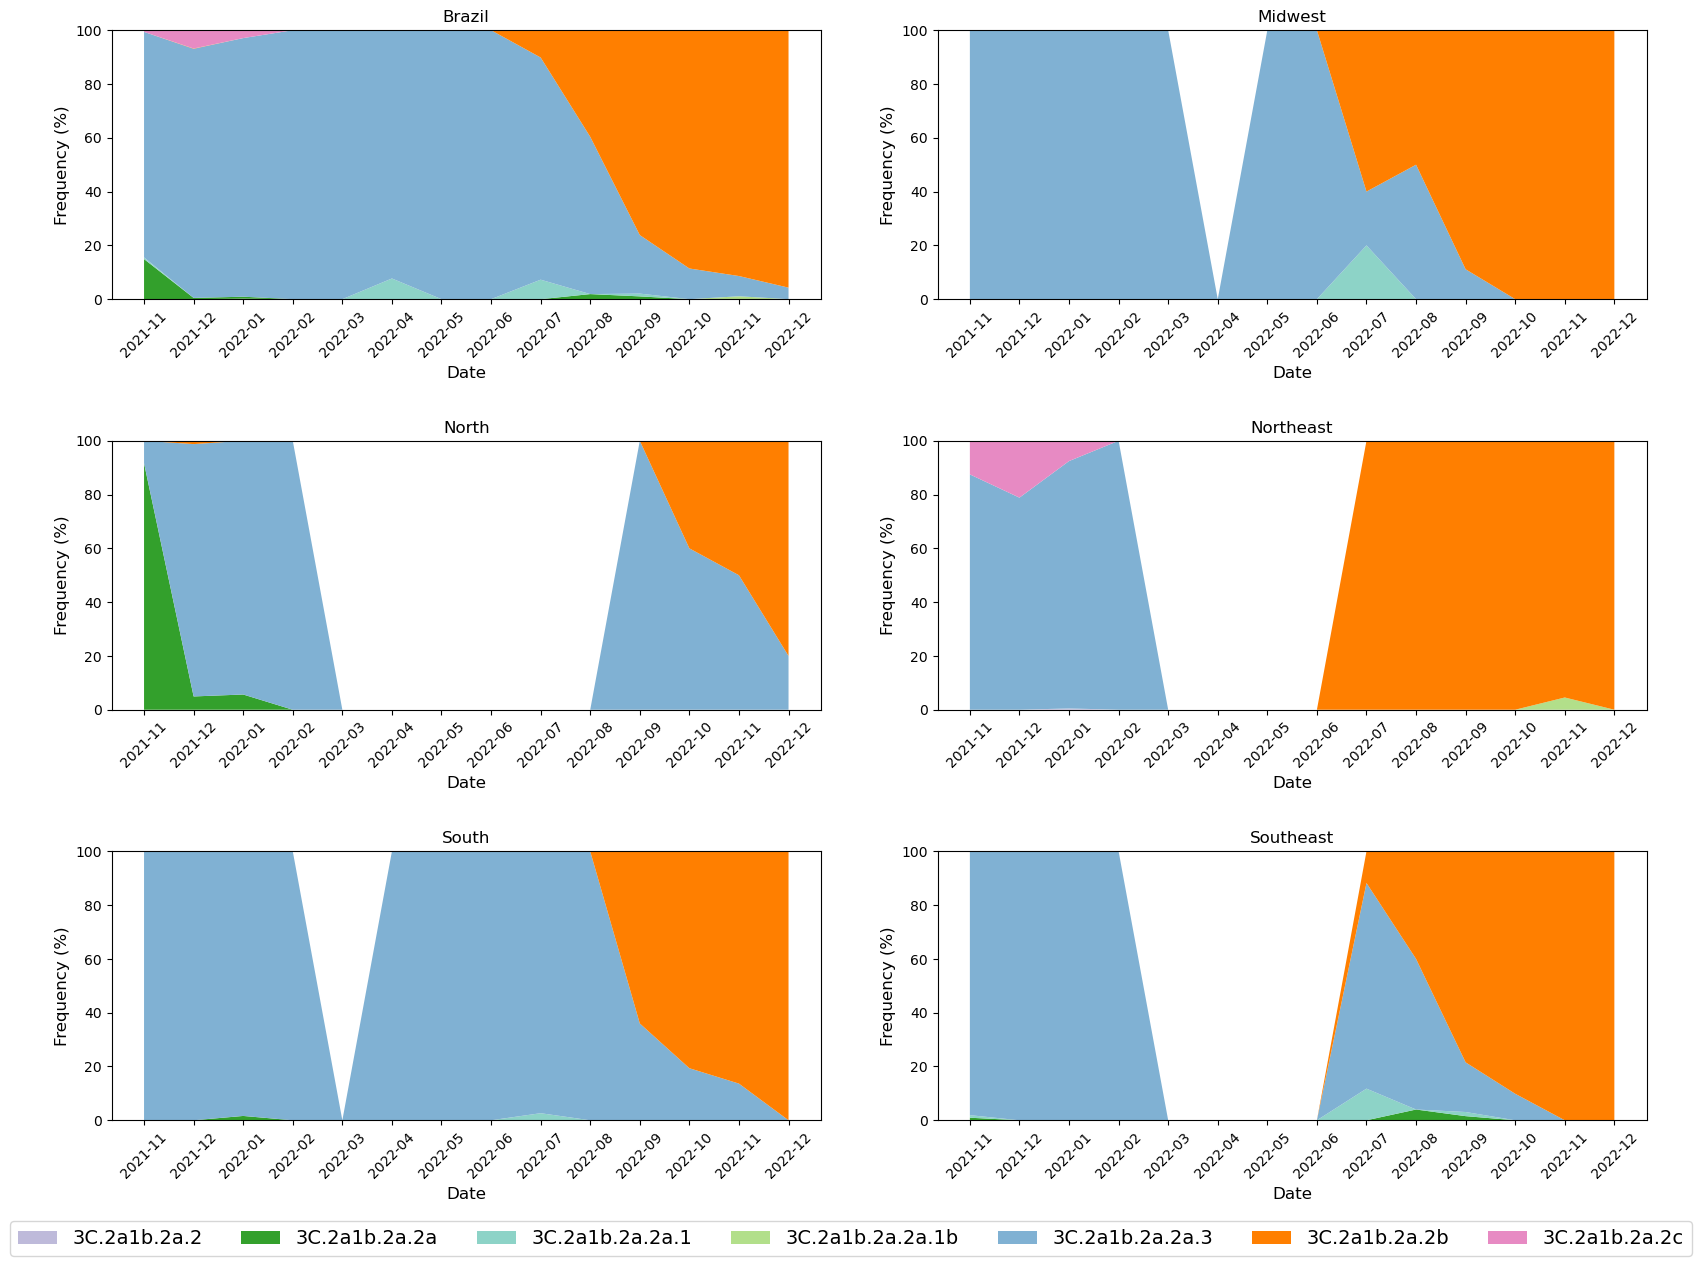

In [65]:
unique_clades = set(df['lineage'])

# Generate a dictionary of colors for each clade
#clade_color_dict = {clade: plt.cm.get_cmap('Paired').colors[i] for i, clade in enumerate(unique_clades)}
#clade_color_dict = {"6B.1A.5a.1": "#8dd3c7", "6B.1A.5a.2a": "#e78ac3", "6B.1A.5a.2": "#bebada", "6B.1A.5a.2a.1": "#80b1d3"}

clade_color_dict = {"3C.2a1b.2a.1": "#E31A1C", "3C.2a1b.2a.1a.1": "#E6AB02", "3C.2a1b.2a.2": "#bebada", "3C.2a1b.2a.2c": "#e78ac3", "3C.2a1b.2a.2b": "#FF7F00", "3C.2a1b.2a.2a": "#33A02C", "3C.2a1b.2a.2a.2": "#6A3D9A", "3C.2a1b.2a.2a.1": "#8dd3c7", "3C.2a1b.2a.2a.1a": "#FB9A99", "3C.2a1b.2a.2a.1b": "#B2DF8A", "3C.2a1b.2a.2a.3": "#80b1d3", "3C.2a1b.2a.2a.3b": "#B15928", "3C.2a1b.2a.2a.3a": "#1F78B4", "3C.2a1b.2a.2a.3a.1": "#E7298A"}
# Add more clades and colors as needed

# Create a ListedColormap using the colors from the dictionary

max_freq_value = 0
num_plots = len(MACRORIGIONS) + 1
num_rows = (num_plots + 1) // 2
#fig, axs = plt.subplots(num_rows, 2, figsize=(16, 12), constrained_layout=True)
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 12), constrained_layout=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.075})

#fig.suptitle('Subclade Frequency by Macroregion', fontsize=20)

all_labels = []
handles=[]
labels=[]
handle_dict={}
COUNT=-1
for ITER in range(num_plots):
    i, j = divmod(ITER, 2)
    
    if ITER == 0:
        freq_por_mes = df1
        #freq_por_mes = freq_por_mes / freq_por_mes.sum(axis=0)*100
        freq_por_mes = freq_por_mes.T/freq_por_mes.sum(axis=1)*100
        freq_por_mes = freq_por_mes.T
    
    else:
        COUNT+=1
        df2 = df.loc[np.where(df['macroregion'] == MACRORIGIONS[COUNT])]
        df2 = df2[['collection_date', 'lineage']]
        df2['month'] = df2['collection_date'].dt.to_period('M')

        freq_por_mes = df2.groupby(['month', 'lineage']).size().unstack(fill_value=0)
        freq_por_mes = freq_por_mes.T/freq_por_mes.sum(axis=1)*100
        freq_por_mes = freq_por_mes.T

        freq_por_mes = complete_dataframe(df1=df1, df2=freq_por_mes, with_nonzero=False)
    
    max_freq_value = max(max_freq_value, freq_por_mes.values.max())

    days = [str(month) for month in freq_por_mes.index]

    # Use the list of colors to assign unique colors to each clade
    clade_colors=[clade_color_dict[c] for c in freq_por_mes.columns]
    
    lines = axs[i, j].stackplot(days, freq_por_mes.T.values, labels=freq_por_mes.columns, colors =clade_colors)
    h, l = axs[i, j].get_legend_handles_labels()
    for hi in range(len(h)):
        handle_dict[l[hi]] = h[hi] 
        
    handles.extend(h)
    labels.extend(l)
    
    if ITER == 0:
        axs[i, j].set_title("Brazil")
    else:
        axs[i, j].set_title(MACRORIGIONS[COUNT])
        
    axs[i, j].set_xlabel('Date')
    axs[i, j].tick_params(axis='x', rotation=45)
    
    axs[i, j].set_ylabel('Frequency (%)')
    #axs[i, j].legend()

# Set the same y-axis range for all subplots
for i in range(num_rows):
    for j in range(2):
        axs[i, j].set_ylim(0, max_freq_value)

if num_plots % 2 != 0:
    fig.delaxes(axs[num_rows - 1, 1])

#LEGEND={}

#for Li in range(len(labels)):
#    LEGEND[labels[Li]]=handles[Li]

# Add a general legend
fig.legend(handles=list(handle_dict.values()), labels=list(handle_dict.keys()), loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(set(df.lineage)), fontsize = '14')
fig.savefig("metadata_h3n2_Brazil_common_zero.pdf", dpi=300, bbox_inches='tight')
plt.show()
